In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!git clone https://github.com/ultralytics/yolov5
!cd yolov5
import torch
torch.cuda.empty_cache()
import torch
import glob
import random
import cv2
import matplotlib.pyplot as plt

Cloning into 'yolov5'...
remote: Enumerating objects: 15343, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 15343 (delta 1), reused 2 (delta 0), pack-reused 15335
Receiving objects: 100% (15343/15343), 14.21 MiB | 20.53 MiB/s, done.
Resolving deltas: 100% (10524/10524), done.


In [2]:
!pip install -qU python-gdcm pydicom pylibjpeg
import importlib
import pydicom, cv2

In [4]:
from PIL import Image
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut


def read_data(path, voi_lut = True, fix_monochrome = True):
    # Original from: https://www.kaggle.com/raddar/convert-dicom-to-np-array-the-correct-way
    dicom = pydicom.read_file(path)
    
    # VOI LUT (if available by DICOM device) is used to transform raw DICOM data to 
    # "human-friendly" view
    if voi_lut:
        data = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        data = dicom.pixel_array
               
    # depending on this value, X-ray may look inverted - fix that:
    if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
        
    data = data - np.min(data)
    data = data / np.max(data)
    data = (data * 255).astype(np.uint8)
        
    return data

def resize(array, size, keep_ratio=False, resample=Image.Resampling.LANCZOS):
    # Original from: https://www.kaggle.com/xhlulu/vinbigdata-process-and-resize-to-image
    im = Image.fromarray(array)
    
    if keep_ratio:
        im.thumbnail((size, size), resample)
    else:
        im = im.resize((size, size), resample)
    
    return im

In [13]:
import pandas as pd
import numpy as np
def rtf(r):
    return f"/kaggle/input/rsna-breast-cancer-detection/train_images/{r['patient_id']}/{r['image_id']}.dcm"
tr = pd.read_csv("/kaggle/input/rsna-breast-cancer-detection/train.csv") 
imags = [1096308702, 982883275, 1446339465, 1563019139, 551129512]
for i in imags:
    q = tr.query(f"image_id == {i}").iloc[0]
    f = rtf(q)
    fout = f"/kaggle/working/test/test_{i}_b.png"
    img=read_data(f)
    cv2.imwrite(fout, img)
    print("\n\n",fout)



 /kaggle/working/test/test_1096308702_b.png


 /kaggle/working/test/test_982883275_b.png


 /kaggle/working/test/test_1446339465_b.png


 /kaggle/working/test/test_1563019139_b.png


 /kaggle/working/test/test_551129512_b.png


In [6]:
!mkdir /kaggle/working/test

In [14]:
os.chdir("/kaggle/working/yolov5")
!python detect.py --source /kaggle/working/test --weights '/kaggle/input/mammogram-mass-analyzer-v00/mammogram-mass-analyzer-v0.1/yolov5/TRAINED_MODEL_FOLDER/exp50_best.pt' '/kaggle/input/mammogram-mass-analyzer-v00/mammogram-mass-analyzer-v0.1/yolov5/TRAINED_MODEL_FOLDER/exp51_best.pt' --conf-thres 0.25 --iou-thres 0.2 --img 2048 --save-txt --save-conf --exist-ok

detect: weights=['/kaggle/input/mammogram-mass-analyzer-v00/mammogram-mass-analyzer-v0.1/yolov5/TRAINED_MODEL_FOLDER/exp50_best.pt', '/kaggle/input/mammogram-mass-analyzer-v00/mammogram-mass-analyzer-v0.1/yolov5/TRAINED_MODEL_FOLDER/exp51_best.pt'], source=/kaggle/working/test, data=data/coco128.yaml, imgsz=[2048, 2048], conf_thres=0.25, iou_thres=0.2, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: YOLOv5 requirement "tqdm>=4.64.0" not found, attempting AutoUpdate...

requirements: 1 package updated per /kaggle/working/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v7.0-129-gb54fd0a Python-3.7.12 torch-1.13.0+cpu CPU

Fusing layers... 
Model su

/kaggle/working/yolov5/runs/detect/exp/test_1446339465_b.png


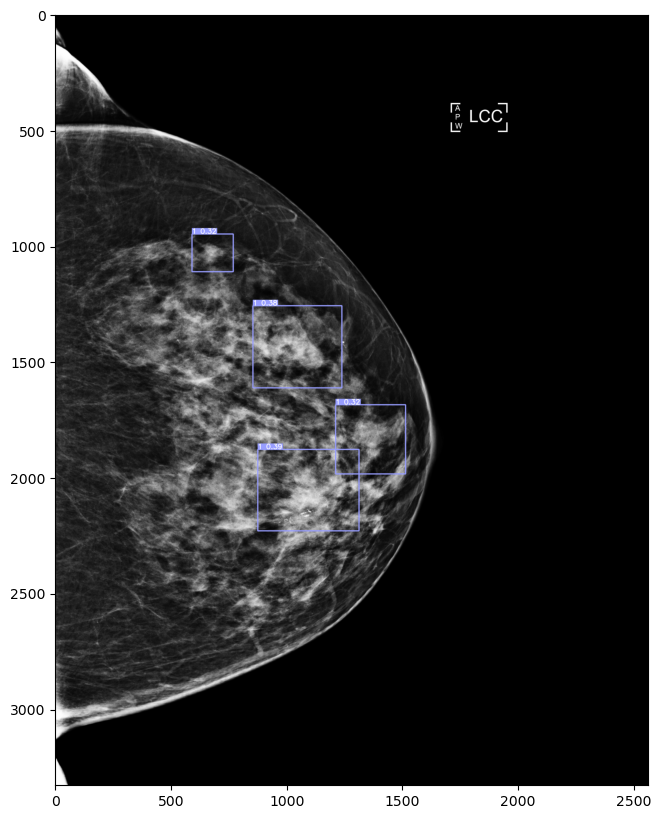

/kaggle/working/yolov5/runs/detect/exp/test_1563019139_b.png


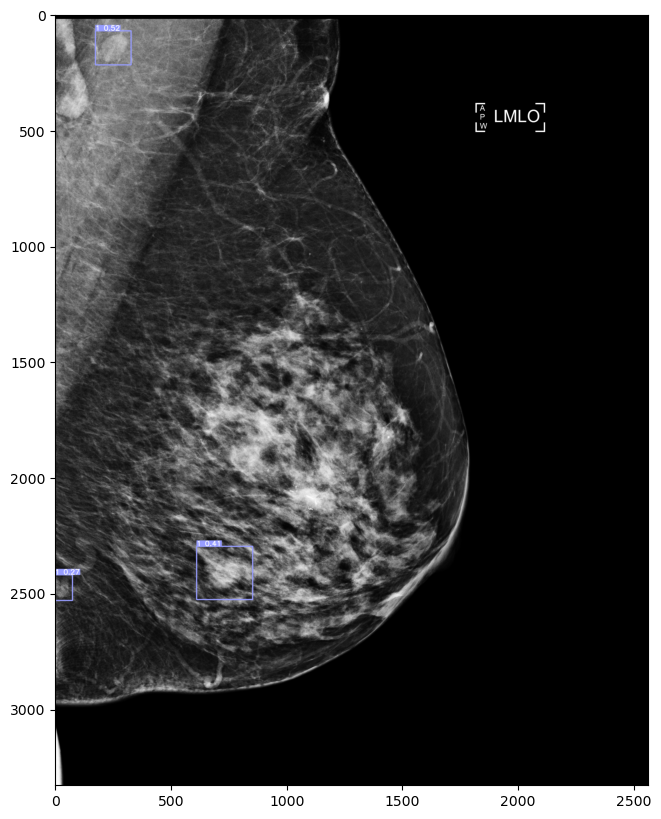

/kaggle/working/yolov5/runs/detect/exp/test_551129512_b.png


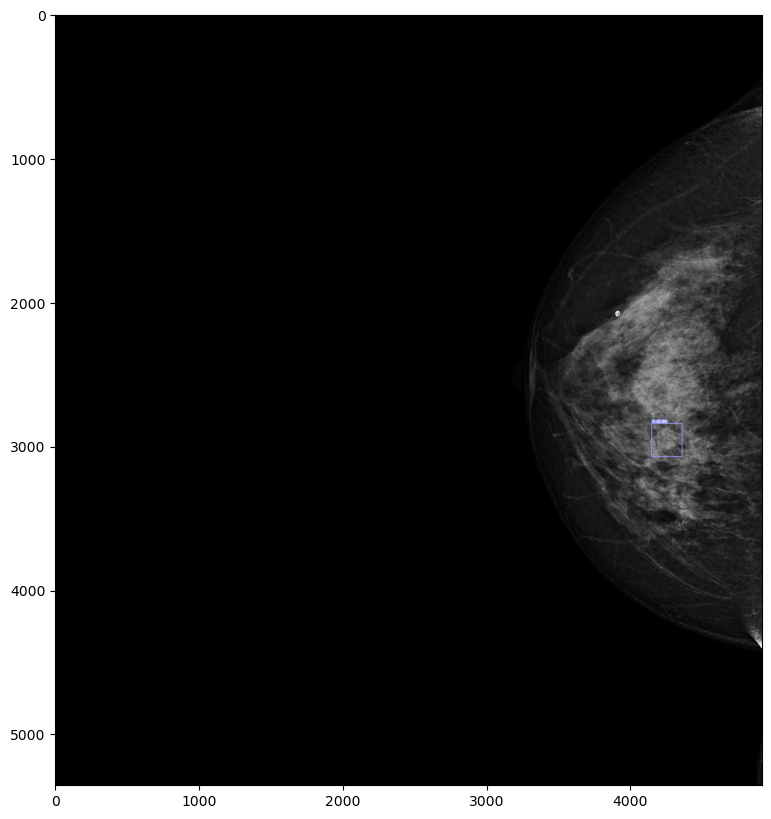

/kaggle/working/yolov5/runs/detect/exp/test_982883275_b.png


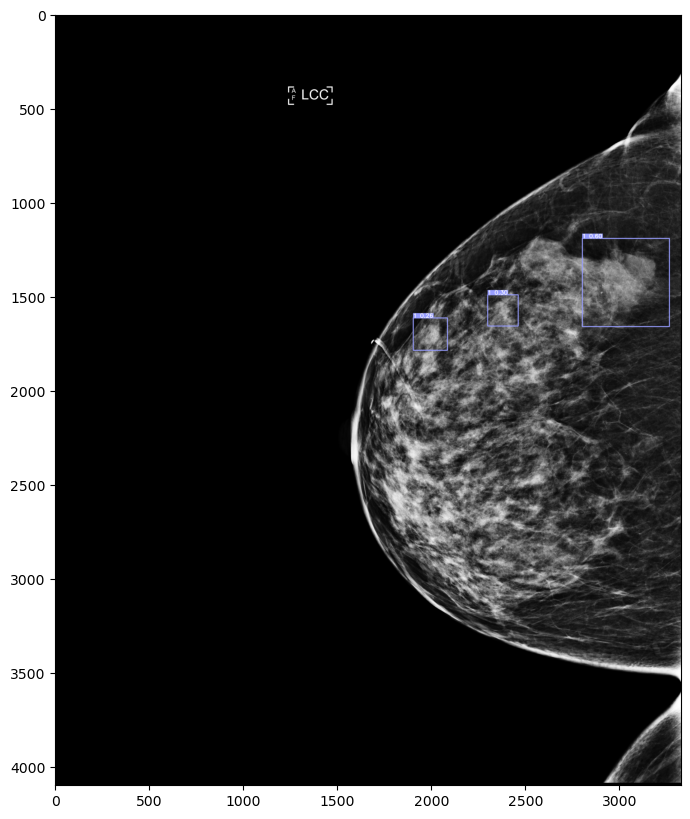

/kaggle/working/yolov5/runs/detect/exp/test_1096308702_b.png


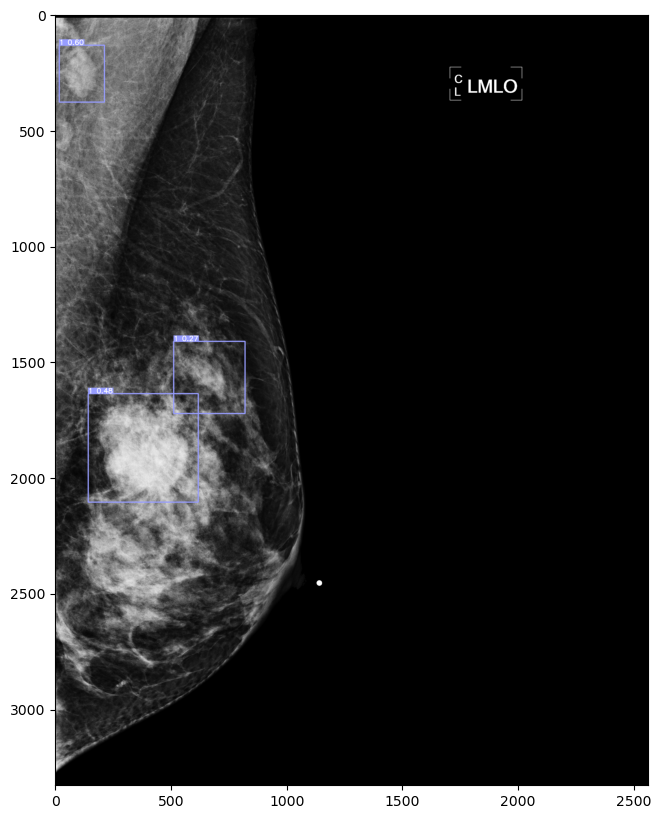

In [15]:
import glob
for f in glob.glob("/kaggle/working/yolov5/runs/detect/exp/*.png"):
    print(f)
    imgFile = cv2.imread(f)
    plt.figure(figsize=(10,10))
    plt.imshow(imgFile)
    plt.show()